
# Week 1 Lab – Linear Regression with One Feature Part 1

Objective: Model stellar luminosity as a function of stellar mass using linear regression with an explicit bias term: L_hat = w * M + b.


## 1. Setup

In [1]:
%pip install numpy matplotlib

  Using cached numpy-2.4.1-cp314-cp314-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (6.6 kB)
  Using cached matplotlib-3.10.8-cp314-cp314-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (52 kB)
  Using cached contourpy-1.3.3-cp314-cp314-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.61.1-cp314-cp314-manylinux1_x86_64.manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_5_x86_64.whl.metadata (114 kB)
  Using cached kiwisolver-1.4.9-cp314-cp314-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (6.3 kB)
  Using cached pillow-12.1.0-cp314-cp314-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (8.8 kB)
  Using cached pyparsing-3.3.2-py3-none-any.whl.metadata (5.8 kB)
Using cached numpy-2.4.1-cp314-cp314-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (16.4 MB)
Using cached matplotlib-3.10.8-cp314-cp314-manylinux_2_27_x86_64.manylinux_2_28_x86_64.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=4,suppress=True)

In [30]:
w_true = ((L[1] - L[0])/(M[1] - M[0])) #Slope

print(w_true)

slope, c = np.polyfit(M, L, 1)

print(f"Ecuación: L = {slope}*M + {c}")



0.9999999999999996
Ecuación: L = 18.130303030303036*M + -16.835454545454557


## 2. Visualize the Data

Considering the statement we will use a given dataset of length 10, where:

M := Stellar Mass (in units of sollar mass)

L := Stellar luminosity (in units of solar luminosity)

In [ ]:
M = np.array([0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4])

L = np.array([0.15, 0.35, 1.00, 2.30, 4.10, 7.00, 11.2, 17.5, 25.0, 35.0])


10


through matplot we can see the respective information

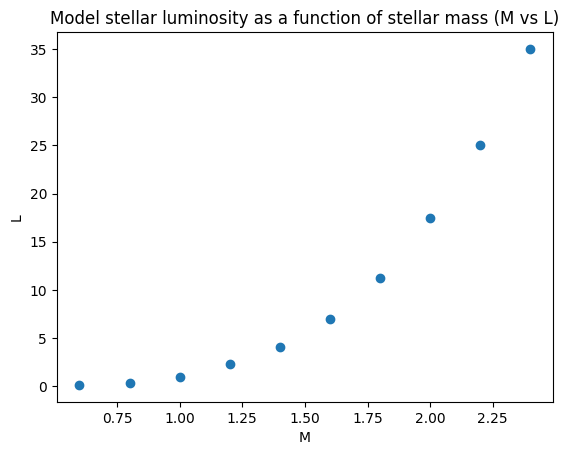

In [54]:
plt.figure()
plt.scatter(M,L)
plt.xlabel("M")
plt.ylabel("L")
plt.title("Model stellar luminosity as a function of stellar mass (M vs L)")
plt.show()

## 3. Model and Loss

We use the model (hypothesis function):

$$
f_{w,b}(m^{(i)}) = w m^{(i)} + b
$$

where:
- $w$ is the slope,
- $b$ is the intercept.

In [16]:
def predict (m, w, b):
    return w * m + b

w_test = 0.0
b_test = 0.0

l_hat_test = predict(M, w_test, b_test)
print("First 3 predictions with w = 0, b = 0:", l_hat_test[:3])

First 3 predictions with w = 0, b = 0: [0. 0. 0.]


## 3.1 Mean Squared Error (Cost Function) $J(w,b)$

We define the **mean squared error** cost function:

$$
J(w,b) = \frac{1}{2n} \sum_{i=1}^{n} \big( f_{w,b}(m^{(i)}) - l^{(i)} \big)^2
$$


In [17]:
def compute_cost(m, l, w, b):
    n = m.shape[0]
    l_hat = w * m + b
    errors = l_hat - l
    cost = (1 / (2 * n)) * np.sum(errors ** 2)
    return cost

print("Cost with w = 0, b = 0: ", compute_cost(M, L, w_test, b_test))

Cost with w = 0, b = 0:  117.69675000000001


## 4. Cost Surface - Visualize the Cost Function as a Surface

We can visualize how $J(w,b)$ changes as we vary $w$ and $b$.

Below we plot the **cost surface** $J(w,b)$ in 3D.

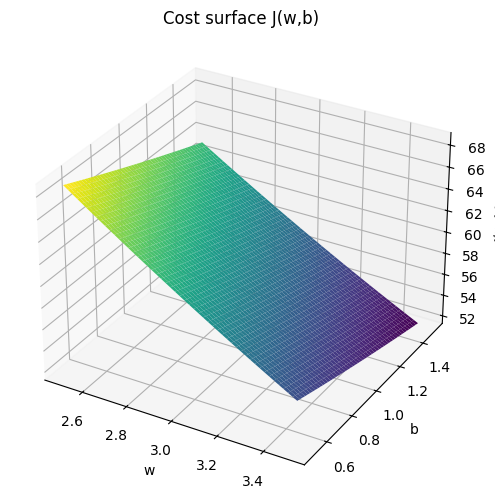

In [20]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

w_values = np.linspace(2.5, 3.5, 1000)
b_values = np.linspace(0.5, 1.5, 1000)

W, B = np.meshgrid(w_values, b_values)
J_vals = np.zeros_like(W)
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        J_vals[i, j] = compute_cost(M, L, W[i,j], B[i,j])

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W, B, J_vals, cmap=cm.viridis, linewidth=0, antialiased=True)
ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_zlabel("J(w,b)")
ax.set_title("Cost surface J(w,b)")
plt.show()

## 5. Gradients

We use **gradient descent** with the update rules:

$$
\frac{\partial J}{\partial w} = \frac{1}{n} \sum_{i=1}^{n} \big( f_{w,b}(m^{(i)}) - l^{(i)} \big) m^{(i)}, \quad
\frac{\partial J}{\partial b} = \frac{1}{n} \sum_{i=1}^{n} \big( f_{w,b}(m^{(i)}) - l^{(i)} \big)
$$

Update:

$$
w := w - \alpha \frac{\partial J}{\partial w}, \quad
b := b - \alpha \frac{\partial J}{\partial b}
$$

## 5.1 Compute Gradient (non-vectorized)

In [22]:
def compute_gradients(M_list, L_list, w, b):
    n_local = len(M_list)
    sum_dw = 0.0
    sum_db = 0.0

    for i in range(n_local):
        f_wb = w * M_list[i] + b
        error = f_wb - L_list[i]
        sum_dw += error * M_list[i]
        sum_db += error
    
    dj_dw = sum_dw / n_local
    dj_db = sum_db / n_local

    return dj_dw, dj_db

dj_dw_test, dj_db_test = compute_gradients(M, L, w_test, b_test)
print("Gradients at w=0, b=0: ", dj_dw_test, dj_db_test)

Gradients at w=0, b=0:  -21.523000000000003 -10.36


## 5.2 Compute Gradient (vectorized)

In [25]:
def compute_gradients_vectorized(M, L, w, b):
    n = M.shape[0]
    L_hat = w * M + b
    errors = L_hat - L

    dj_dw = (1 / n) * np.sum(errors * M)
    dj_db = (1 / n) * np.sum(errors)

    return dj_dw, dj_db

dj_dw_test, dj_db_test = compute_gradients_vectorized(M, L, w_test, b_test)
print("Gradients at w=0, b=0: ", dj_dw_test, dj_db_test)

Gradients at w=0, b=0:  -21.523 -10.36


## 5.3 Implement the Gradient Descent Loop

In [49]:
def gradient_descent(M, L, w_init, b_init, alpha, num_iterations):
    w = w_init
    b = b_init
    history = []

    for i in range(num_iterations):
        dj_dw, dj_db = compute_gradients(M, L, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        cost = compute_cost(M, L, w, b)
        history.append((i, cost))

        if i % max(1, (num_iterations // 10)) == 0:
            print(f"Iteration {i:4d}: w={w:7.4f}, b={b:7.4f}, cost={cost:8.4f}")

    return w, b, history

alpha = 0.01
num_iterations = 2000

w_init = 0.0
b_init = 0.0

w_learned, b_learned, history = gradient_descent(M, L, w_init, b_init, alpha, num_iterations)
print("\nLearned parameters:")
print("w =", w_learned)
print("b =", b_learned)


Iteration    0: w= 0.2152, b= 0.1036, cost=112.0896
Iteration  200: w= 7.9674, b=-0.0073, cost= 28.0913
Iteration  400: w= 9.7253, b=-2.9093, cost= 22.3208
Iteration  600: w=11.1759, b=-5.3129, cost= 18.3703
Iteration  800: w=12.3762, b=-7.3015, cost= 15.6658
Iteration 1000: w=13.3693, b=-8.9470, cost= 13.8142
Iteration 1200: w=14.1910, b=-10.3085, cost= 12.5466
Iteration 1400: w=14.8709, b=-11.4350, cost= 11.6788
Iteration 1600: w=15.4334, b=-12.3670, cost= 11.0847
Iteration 1800: w=15.8989, b=-13.1383, cost= 10.6780

Learned parameters:
w = 16.2822484076734
b = -13.77345340049044


## 5.4 Plot the Cost over Iterations

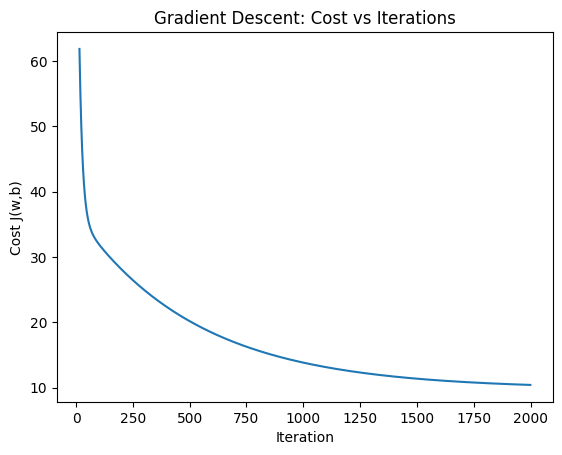

In [ ]:
iterations = [it for it, c in history]
costs = [c for it, c in history]

plt.figure()
plt.plot(iterations[15:], costs[15:])
plt.xlabel("Iteration")
plt.ylabel("Cost J(w,b)")
plt.title("Gradient Descent: Cost vs Iterations")
plt.show()

## 5.5 Visualize the Fitted Line

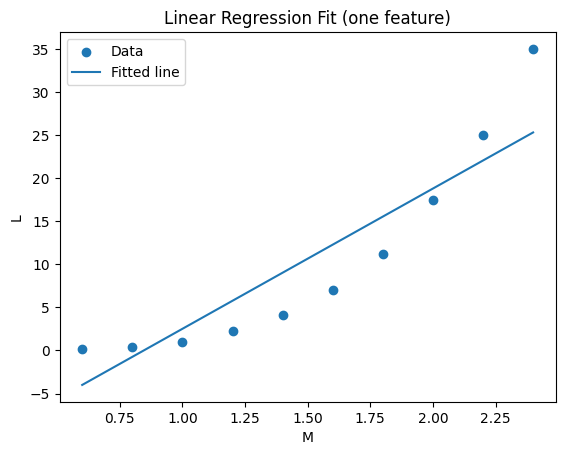

In [53]:
plt.figure()
plt.scatter(M, L, label="Data")
L_pred = predict(M, w_learned, b_learned)
plt.plot(M, L_pred, label="Fitted line")
plt.xlabel("M")
plt.ylabel("L")
plt.title("Linear Regression Fit (one feature)")
plt.legend()
plt.show()